## Resources
- https://pycaret.org/
- https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL?usp=sharing
- https://towardsdatascience.com/build-and-deploy-your-first-machine-learning-web-app-e020db344a99

In [29]:
import pandas as pd
from pycaret.classification import *

titanic = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# create transformation pipeline
titanicSetup = setup(titanic, target = 'Survived', session_id = 123,
           normalize = True,
           polynomial_features = True,
           trigonometry_features = True,
           feature_interaction=True,
           bin_numeric_features= ['Age'],
           ignore_features=['Name', 'Ticket','PassengerId'],
          categorical_features=['Cabin', 'Embarked', 'Pclass'],
          numeric_features=['SibSp', 'Parch', 'Fare']
          )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.833000,0.853700,0.727500,0.822100,0.768200,0.638700
1,Extreme Gradient Boosting,0.831400,0.852000,0.715000,0.828600,0.763600,0.633900
2,Light Gradient Boosting Machine,0.818600,0.855400,0.736400,0.784500,0.756300,0.612300
3,Ridge Classifier,0.812100,0.000000,0.698400,0.796300,0.736600,0.592700
4,Gradient Boosting Classifier,0.812100,0.849000,0.694400,0.795700,0.737200,0.592600
5,Extra Trees Classifier,0.805700,0.845900,0.731900,0.760200,0.742900,0.587100
6,Random Forest Classifier,0.797700,0.833600,0.698400,0.763900,0.725900,0.566500
7,Ada Boost Classifier,0.796000,0.843500,0.715200,0.746900,0.726000,0.564200
8,Logistic Regression,0.791200,0.840100,0.690000,0.753300,0.713400,0.550800
9,K Neighbors Classifier,0.765400,0.812500,0.673600,0.709000,0.685800,0.499700


In [32]:
# CatBoost Classifier is the most accurate model so we'll use this
catboost_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.8937,0.7500,0.8182,0.7826,0.6580
1,0.8413,0.8259,0.7917,0.7917,0.7917,0.6635
2,0.8571,0.9135,0.6667,0.9412,0.7805,0.6791
3,0.8226,0.8974,0.6087,0.8750,0.7179,0.5945
4,0.7742,0.7423,0.6667,0.7273,0.6957,0.5167
5,0.8226,0.7950,0.7083,0.8095,0.7556,0.6173
6,0.8871,0.8640,0.7917,0.9048,0.8444,0.7565
7,0.8548,0.8586,0.7917,0.8261,0.8085,0.6917
8,0.7742,0.8421,0.6250,0.7500,0.6818,0.5090
9,0.8548,0.9046,0.8750,0.7778,0.8235,0.7010


In [54]:
tuned_catboost_model = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8520,0.7917,0.8261,0.8085,0.6947
1,0.8254,0.8013,0.7500,0.7826,0.7660,0.6268
2,0.8571,0.9455,0.7083,0.8947,0.7907,0.6845
3,0.8065,0.9041,0.6087,0.8235,0.7000,0.5618
4,0.7258,0.7346,0.5000,0.7059,0.5854,0.3893
5,0.7903,0.7939,0.6250,0.7895,0.6977,0.5405
6,0.8710,0.8783,0.7917,0.8636,0.8261,0.7238
7,0.7903,0.8564,0.7500,0.7200,0.7347,0.5615
8,0.7258,0.8651,0.5000,0.7059,0.5854,0.3893
9,0.8226,0.9232,0.8333,0.7407,0.7843,0.6345


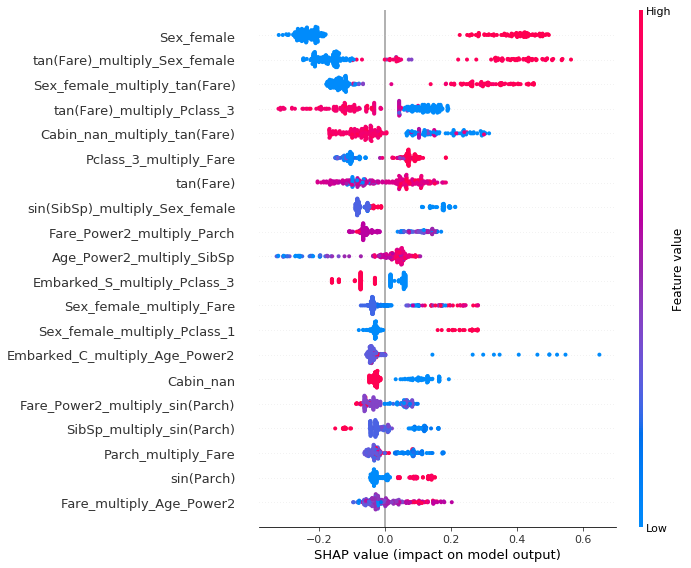

In [59]:
interpret_model(tuned_catboost_model, plot = 'summary')

In [67]:
predict_model(tuned_catboost_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.806,0.8652,0.699,0.7742,0.7347,0.5824


In [68]:
# Finalize Model: returns a model that has been trained on the entire dataset. 
titanic_catboost_final = finalize_model(tuned_catboost_model)

In [70]:
# Show the parameters used for final model
titanic_catboost_final.get_params()

{'iterations': 100,
 'learning_rate': 0.2,
 'depth': 6,
 'l2_leaf_reg': 100,
 'border_count': 50,
 'silent': True,
 'random_state': 123}

In [72]:
# make prediction with tuned model on full dataset
predict_model(titanic_catboost_final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8881,0.9498,0.767,0.9294,0.8404,0.7554


,SibSp,Parch,Fare,Age_Power2,sin(Parch),Fare_Power2,tan(Fare),sin(SibSp),Pclass_1,Pclass_2,...,Fare_multiply_Cabin_nan,Cabin_nan_multiply_Age_Power2,Age_3.0_multiply_Pclass_2,Embarked_S_multiply_Pclass_3,Cabin_nan_multiply_Fare,Age_Power2_multiply_Fare,Age_Power2_multiply_Sex_female,Survived,Label,Score
0,-0.474545,-0.473674,-0.386671,-0.169446,-0.490713,-0.192581,0.124392,-0.522320,0.0,1.0,...,-0.386671,-0.169446,0.0,0.0,-0.386671,0.065520,-0.000000,0,0,0.1264
1,0.432793,-0.473674,0.395814,-0.189616,-0.490713,-0.047011,0.054107,1.516316,1.0,0.0,...,0.000000,-0.000000,0.0,0.0,0.000000,-0.075053,-0.189616,1,1,0.9549
2,3.154809,0.767630,-0.061999,-1.175566,1.743912,-0.153354,0.125625,-2.355830,0.0,0.0,...,-0.061999,-1.175566,0.0,0.0,-0.061999,0.072884,-0.000000,0,0,0.1210
3,-0.474545,-0.473674,-0.486337,-0.189616,-0.490713,-0.198598,0.114377,-0.522320,0.0,0.0,...,-0.486337,-0.189616,0.0,1.0,-0.486337,0.092217,-0.000000,0,0,0.0753
4,1.340132,-0.473674,0.831478,-0.684858,-0.490713,0.109635,0.128911,1.680639,0.0,1.0,...,0.831478,-0.684858,0.0,0.0,0.831478,-0.569444,-0.000000,0,0,0.1003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,-0.474545,-0.473674,-0.486337,-0.030206,-0.490713,-0.198598,0.114377,-0.522320,0.0,0.0,...,-0.000000,-0.000000,0.0,1.0,-0.000000,0.014690,-0.000000,1,0,0.3374
264,0.432793,2.008933,0.660333,-0.533266,1.924033,0.041650,0.120871,1.516316,0.0,1.0,...,0.660333,-0.533266,1.0,0.0,0.660333,-0.352133,-0.533266,1,1,0.7946
265,1.340132,-0.473674,-0.364355,0.707540,-0.490713,-0.190846,0.186623,1.680639,0.0,0.0,...,-0.364355,0.707540,0.0,1.0,-0.364355,-0.257796,0.000000,0,0,0.1167
266,1.340132,-0.473674,2.042579,1.627196,-0.490713,0.829194,0.109864,1.680639,1.0,0.0,...,2.042579,1.627196,0.0,0.0,2.042579,3.323677,0.000000,1,0,0.4065


In [79]:
# save transformation pipeline and final model 
save_model(titanic_catboost_final, model_name = 'data/model_pycaret_pipeline')

Transformation Pipeline and Model Succesfully Saved


## Make predictions for submission

In [75]:
# generate predictions on unseen data
predictions = predict_model(titanic_catboost_final, data = test)

In [78]:
# The 'Label' and 'Score' columns are added onto the test set. 
# Label is the prediction and Score is the probability of the prediction.
predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1867
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2964
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.1286
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.3637
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.5697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.2738
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9649
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.1078
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.2738


In [80]:
submission = predictions[['PassengerId', 'Label']]

In [82]:
submission.columns = ['PassengerId', 'Survived']

In [83]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
# Create file for submission
submission.to_csv('data/submission_pycaret_pipeline.csv', index = False)